In [2]:
import numpy as np
import pickle
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd

In [3]:
with open('../../Downloads/distributions/big_state_reward_dict_with_actions_for_quantiles_all_data_noweather.pkl','rb') as f:
    t = pickle.load(f)

In [4]:
def get_all_states(d):
    alls = []
    for k,v in d.items():
        for l in v.values():
            states = l[0].split('-')
            state_vector = [1.0]
            if states[1]!='2':
                state_vector= state_vector+[float(states[i]) for i in range(1,len(states))]
                alls.append(state_vector)
    return alls

In [5]:
def get_all_states_act_sugg(d):
    alls = []
    for k,v in d.items():
        for l in v.values():
            states = l[0].split('-')
            state_vector = [1.0]
            if states[1]!='2' and type(l[3])!=str:
                
                state_vector= state_vector+[float(states[i]) for i in range(1,len(states))]
                alls.append(state_vector)
    return alls

In [6]:
data = get_all_states_act_sugg(t['dict'])
len(data)


5305

In [7]:
coeffs = np.array([0.04772972,  0.0696645 ,  0.21549613,  0.24941052 ,-0.22475609 , 0.22540878])

coeffs = np.array([0.07912183,  0.11717383,  0.12143829, -0.07507128,  0.25115448])



In [8]:
all_ys = [np.dot(coeffs.T,s) for s in data]


In [9]:
bins = []
for i in range(5,105,5):
    print(i)
    print(np.percentile(np.array(all_ys),i))
    bins.append(np.percentile(np.array(all_ys),i))

5
0.00405055
10
0.07912183
15
0.07912183
20
0.12122438000000002
25
0.12122438
30
0.12548884
35
0.19629566
40
0.19629566
45
0.20056012
50
0.24266267000000002
55
0.25520503
60
0.31773395000000004
65
0.33027631
70
0.33027631
75
0.37237886000000003
80
0.37237886000000003
85
0.37664332
90
0.44745014000000005
95
0.49381715000000004
100
0.5688884300000001


In [190]:
np.histogram(np.array(all_ys),bins = bins)




(array([3912, 2946, 5139, 3561, 3695, 3396, 5490, 5127]),
 array([-0.00833635,  0.0977    ,  0.14737665,  0.20920488,  0.27915672,
         0.31699027,  0.36491788,  0.42849515,  0.5345315 ]))

In [196]:
len([i for i in all_ys if i>-0.00833635 and i<0.13553355])


3154

In [218]:
 bins = pd.cut(np.array(all_ys),bins=10, retbins=True)
    

In [10]:

(0.49381715000000004-0.00405055)/4





0.12244165000000001

In [243]:

print(len([j for j in all_ys if  j<= 0.349 and j>0.306]))

2014


In [225]:
 for i in pd.cut(np.array(all_ys),bins=20).categories:
    print(i)
    #[print(dir(i))]
    print(len([j for j in all_ys if j>i.left and j<=i.right]))

(-0.121, -0.0773]
1354
(-0.0773, -0.0347]
0
(-0.0347, 0.0079]
2872
(0.0079, 0.0505]
0
(0.0505, 0.0931]
3154
(0.0931, 0.136]
2946
(0.136, 0.178]
3139
(0.178, 0.221]
2853
(0.221, 0.263]
2708
(0.263, 0.306]
3695
(0.306, 0.349]
2014
(0.349, 0.391]
4701
(0.391, 0.434]
2171
(0.434, 0.476]
1764
(0.476, 0.519]
1334
(0.519, 0.561]
2446
(0.561, 0.604]
0
(0.604, 0.647]
1805
(0.647, 0.689]
0
(0.689, 0.732]
397


In [227]:
(0.689--0.0773)/4

0.191575

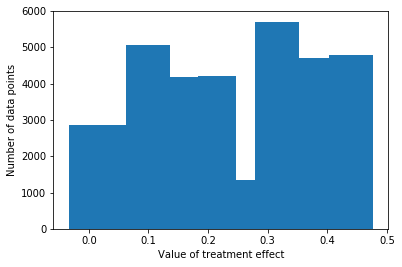

In [241]:
plt.hist(np.array(all_ys),bins=bins)
plt.ylabel('Number of data points')
plt.xlabel('Value of treatment effect')
plt.savefig('10_bins_all_data.png')

In [72]:
check = set([])
for i in data:
    key = '-'.join([str(j) for j in i])
    check.add(key)

In [121]:
s = pd.Series(all_ys)

In [138]:
cuts = pd.qcut(s,5,labels=[str(i) for i in range(5)])

In [139]:
sizes = {}
for i,r in cuts.iteritems():
    if r not in sizes:
        sizes[r]=[]
    sizes[r].append(i)
for k,v in sizes.items():
    print(k)
    print(len(v))

4
7551
1
8197
2
7318
3
6809
0
9478


In [137]:
4823-1957

2866

In [140]:
9478-6809

2669

In [170]:
(0.620--.034)/4

0.1635